Note: you may need to restart the kernel to use updated packages.
         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True
Minimum:3.00
M

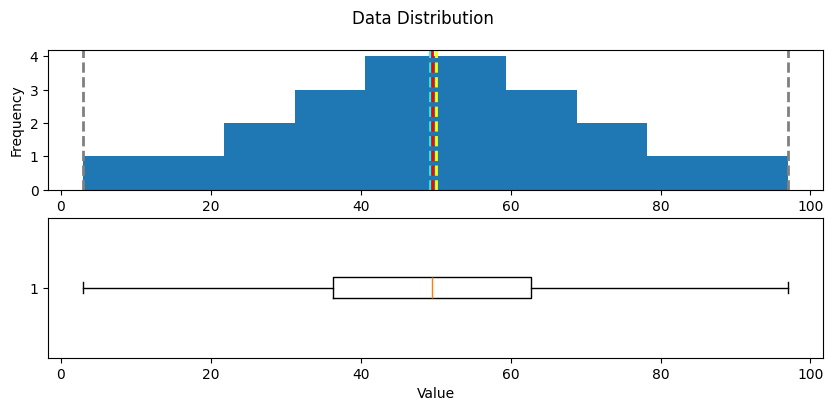

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

# Install wget if not already installed
%pip install wget

import wget
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv'
wget.download(url, 'grades.csv')

df_students = pd.read_csv('grades.csv', delimiter=',', header='infer')

df_students = df_students.dropna()

passes = pd.Series(df_students['Grade'] >= 60)  

df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

print(df_students)

def show_distruibution(var_data):
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    median_val = var_data.median()
    mode_val = var_data.mode()[0]

    print('Minimum:{:.2f}'.format(min_val))
    print('Mean:{:.2f}'.format(mean_val))
    print('Median:{:.2f}'.format(median_val))
    print('Mode:{:.2f}'.format(mode_val))
    print('Maximum:{:.2f}'.format(max_val))

    fig, ax = plt.subplots(2, 1, figsize=(10, 4))

    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=median_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mode_val, color='yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)       

    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle('Data Distribution')

    plt.show()

# Call the function with the Grade column
show_distruibution(df_students['Grade'])

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00


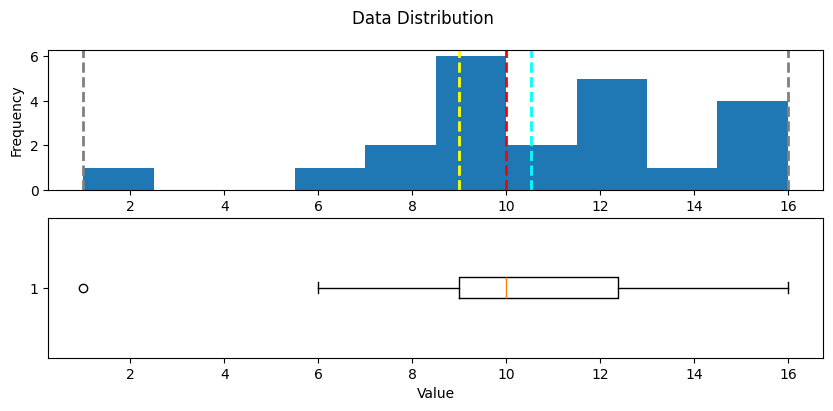

In [4]:
show_distruibution(df_students['StudyHours'])

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00


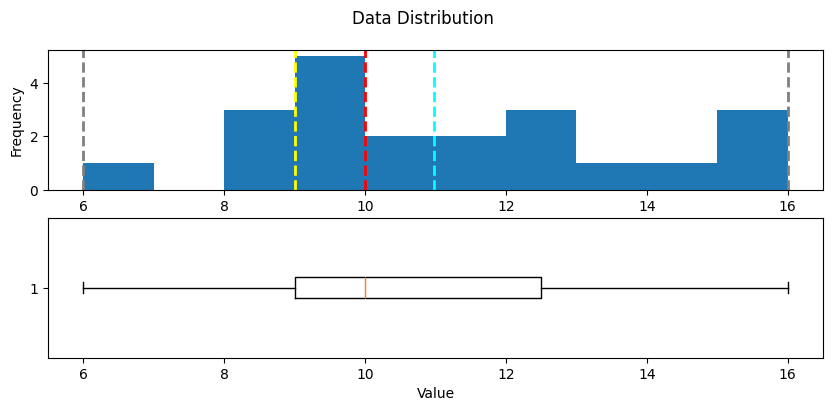

In [5]:
col = df_students[df_students.StudyHours>1]['StudyHours']

show_distruibution(col)

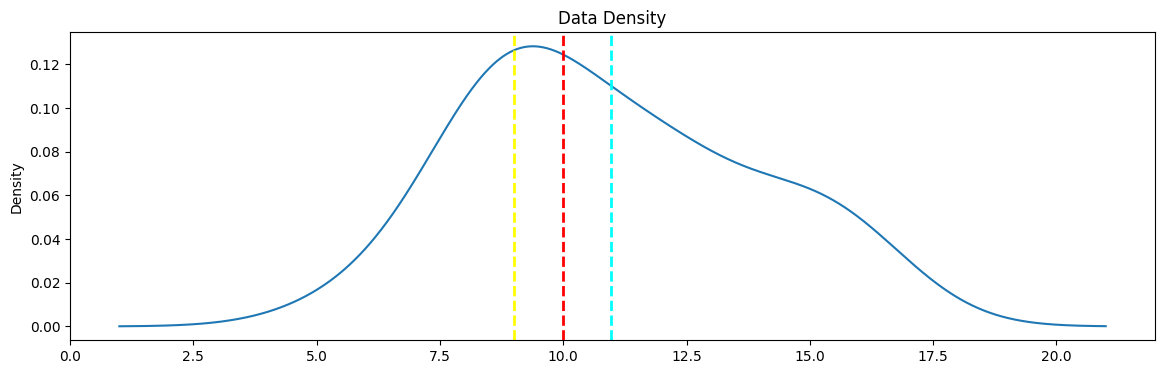

In [ ]:
def show_density(var_data):
    fig = plt.figure(figsize=(14, 4))

    var_data.plot.density()

    plt.title('Data Density')

    plt.axvline(x=var_data.mean(), color='cyan', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.median(), color='red', linestyle='dashed', linewidth=2)  
    plt.axvline(x=var_data.mode()[0], color='yellow', linestyle='dashed', linewidth=2)

    plt.show()


show_density(col)

In [14]:
import math

mean = df_students.StudyHours.mean()

variance = 0

for hours in df_students.StudyHours:
    variance = variance + ((mean -  hours) ** 2)
        
variance = variance/df_students.shape[0]
    
variance

std = math.sqrt(variance)

std

3.4069690366260925

In [17]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    range = col.max() - col.min()
    variance = col.var()
    standartDeviation = col.std()
    
    print(f'{col_name} statistics:')
    print(f'  Range: {range:.2f}')
    print(f'  Variance: {variance:.2f}')
    print(f'  Standard Deviation: {standartDeviation:.2f}')

Grade statistics:
  Range: 94.00
  Variance: 472.54
  Standard Deviation: 21.74
StudyHours statistics:
  Range: 15.00
  Variance: 12.16
  Standard Deviation: 3.49


In [20]:
print(f'%68 of grades will fall between {df_students.Grade.mean() - df_students.Grade.std()} and {df_students.Grade.mean() + df_students.Grade.std()}') 

%68 of grades will fall between 27.443906678253803 and 70.91972968538255


In [22]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [24]:
df_sample = df_students[df_students.StudyHours>1]

df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

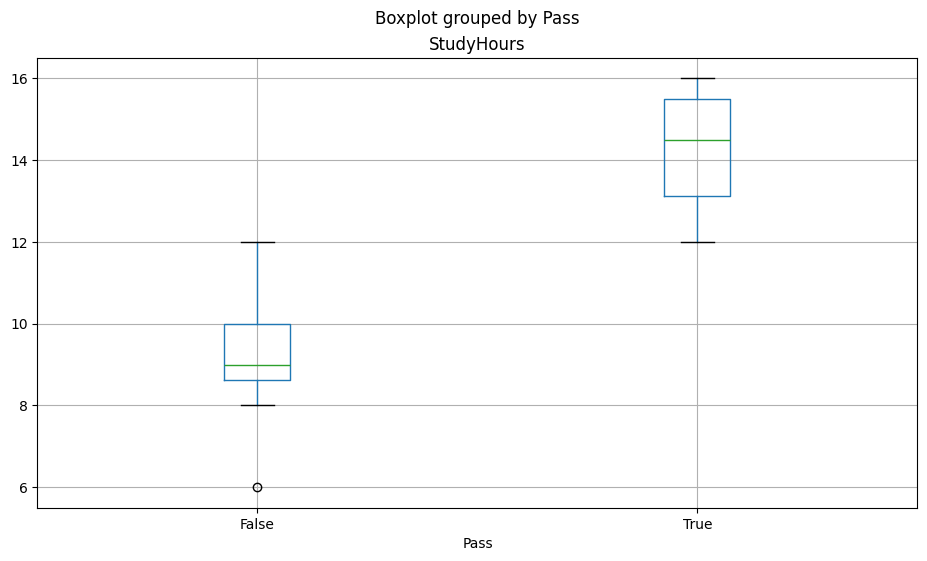

In [27]:
df_sample.boxplot(column = 'StudyHours', by = 'Pass', figsize = (11, 6))

<Axes: xlabel='Name'>

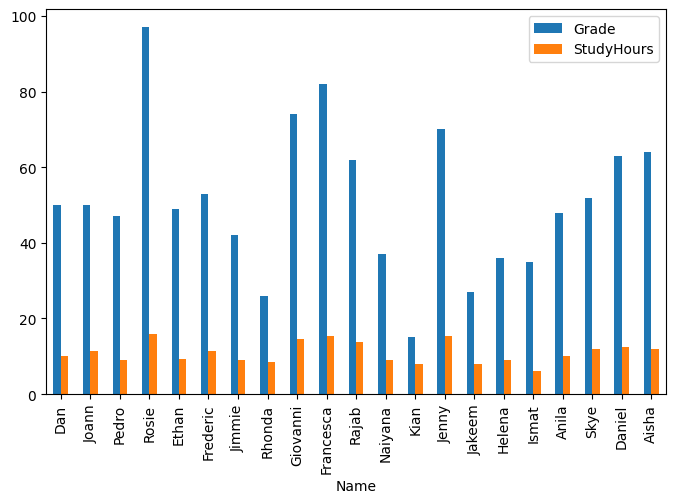

In [28]:
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5))

<Axes: xlabel='Name'>

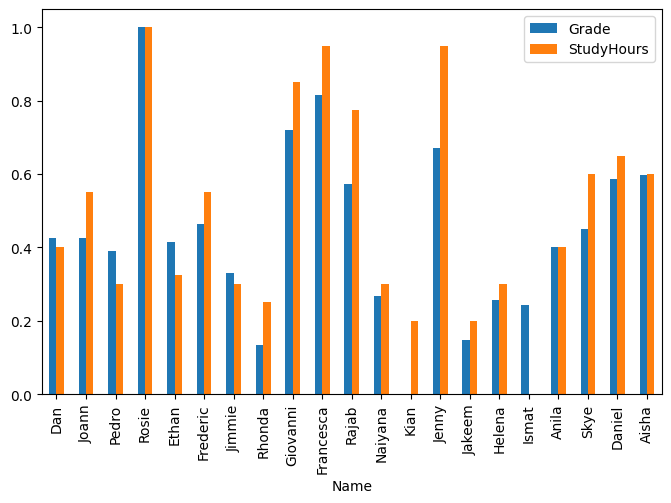

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_sample[['Name','Grade', 'StudyHours']].copy()

df_normalized[['Grade', 'StudyHours']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHours']])

df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5))

In [32]:
df_normalized.Grade.corr(df_normalized.StudyHours)

np.float64(0.9117666413789675)

<Axes: title={'center': 'Grade vs Study Hours'}, xlabel='StudyHours', ylabel='Grade'>

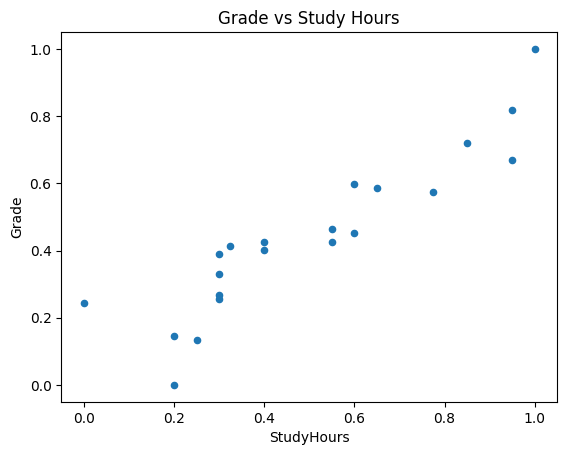

In [33]:
df_normalized.plot.scatter(title= "Grade vs Study Hours", x='StudyHours', y='Grade')

In [34]:
y = mx + b

f(x) 

error = y - f(x) ** 2

NameError: name 'mx' is not defined

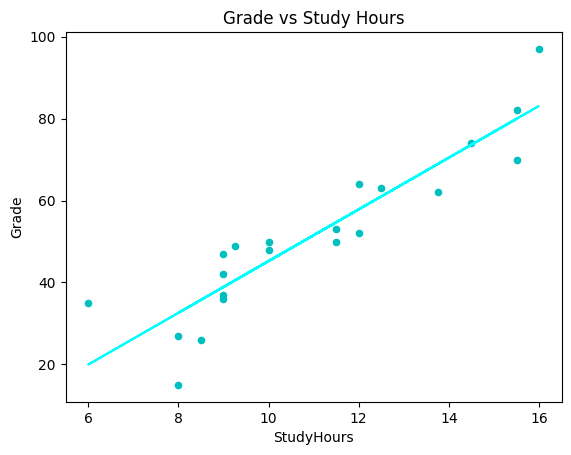

In [36]:
from scipy import stats

df_regression = df_sample[['Grade', 'StudyHours']].copy()

m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])

df_regression['fx'] =  (m * df_regression['StudyHours']) + b

df_regression['error'] = df_regression['fx'] - df_regression['Grade']

df_regression.plot.scatter(x='StudyHours', y='Grade', title='Grade vs Study Hours', color='c')

plt.plot(df_regression['StudyHours'], df_regression['fx'], color='cyan')